<b>Data mining project - 2020/21</b><br>
<b>Author</b>: [Alexandra Bradan](https://github.com/alexandrabradan)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 07/01/2021<b>

In [1]:
%matplotlib inline

# general libraries
import sys
import math
import operator
import itertools
import pydotplus
import collections
import missingno as msno
from pylab import MaxNLocator
from collections import Counter
from collections import OrderedDict

from collections import defaultdict
from IPython.display import Image

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import arange
from numpy import unique
from numpy import argmax
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer

from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.pipeline import make_pipeline as imbmake_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score, precision_score, classification_report, roc_auc_score 

In [2]:
from fim import apriori

In [3]:
data_directory = "../../../data/"
TR_impunted_file = data_directory + "Impunted_Train_HR_Employee_Attrition.csv"
TS_impunted_file = data_directory + "Impunted_Test_HR_Employee_Attrition.csv"
TR_not_impunted = data_directory + "Not_Impunted_Train_HR_Employee_Attrition.csv"
TS_not_impunted = data_directory + "Cleaned_Test_HR_Employee_Attrition.csv"

<h6>Impunted TR Dataframe</h6>

In [4]:
df_impunted = pd.read_csv(TR_impunted_file, sep=",") 
df_impunted.shape

(883, 30)

In [5]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_impunted[column_name]
    
# check dropping output
print(df_impunted.shape)

(883, 24)


In [6]:
df_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       883 non-null    int64  
 1   Attrition                 883 non-null    object 
 2   BusinessTravel            883 non-null    object 
 3   DistanceFromHome          883 non-null    int64  
 4   Education                 883 non-null    int64  
 5   EnvironmentSatisfaction   883 non-null    int64  
 6   Gender                    883 non-null    object 
 7   JobInvolvement            883 non-null    int64  
 8   JobLevel                  883 non-null    int64  
 9   JobRole                   883 non-null    object 
 10  JobSatisfaction           883 non-null    int64  
 11  MonthlyIncome             883 non-null    int64  
 12  NumCompaniesWorked        883 non-null    int64  
 13  OverTime                  883 non-null    object 
 14  PercentSal

<h6>Not-impunted TR DataFrame</h6>

In [7]:
df_not_impunted = pd.read_csv(TR_not_impunted, sep=",") 
df_not_impunted.shape

(883, 30)

In [8]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_not_impunted[column_name]
    
# check dropping output
print(df_not_impunted.shape)

(883, 24)


<h6> Impunted TS DataFrame </h6>

In [9]:
df_ts = pd.read_csv(TS_impunted_file, sep=",") 
df_ts.shape

(219, 24)

In [10]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       219 non-null    int64  
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            219 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    219 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             219 non-null    int64  
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h6> Not-impnted TS DataFrame </h6>

In [11]:
df_ts_not_impunted = pd.read_csv(TS_not_impunted, sep=",") 
df_ts_not_impunted.shape

del df_ts_not_impunted["Department"]
del df_ts_not_impunted["MonthlyRate"]


to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsAtCompany"] > 20]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsInCurrentRole"] > 16]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["MonthlyHours"] > 590.9767441860465]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

df_ts_not_impunted.shape

dropped rows = 	8
dropped rows = 	2
dropped rows = 	7


(219, 24)

In [12]:
df_ts_not_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       191 non-null    float64
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            202 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    208 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             168 non-null    float64
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h2> Continuos variables discretisation with K-Means</h2>
K-Means => similar bins' size => IBM's Age and opportunity equity 

In [13]:
df_converted = df_impunted.copy()
df_ts_conv = df_ts.copy()

In [14]:
def print_performed_encoding(column_name, train_encoded):
    column_index = df_impunted.columns.get_loc(column_name)
    encoding_info = {}
    for enc, i in zip(train_encoded, range(0, len(train_encoded))):
        try:
            tmp_list = encoding_info[str(enc)]
            tmp_list.append(df_impunted.iloc[i, column_index])
            encoding_info[str(enc)] = tmp_list
        except KeyError:
            encoding_info[str(enc)] = [df_impunted.iloc[i, column_index]]
            
    for key, value in encoding_info.items():
        min_value = min(value)
        max_value = max(value)
        print(column_name, key, "[%s-%s]" %(min_value, max_value),sep="\t")

In [15]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_converted[[column_name]])
    train_encoded = discretizer.transform(df_converted[[column_name]]).astype(int)
    df_converted[column_name] = train_encoded
    df_ts_conv[column_name] = discretizer.transform(df_ts_conv[[column_name]]).astype(int)
    print_performed_encoding(column_name, train_encoded)

Age	[3]	[48-60]
Age	[1]	[31-38]
Age	[0]	[18-30]
Age	[2]	[39-47]
DistanceFromHome	[1]	[6-13]
DistanceFromHome	[0]	[1-5]
DistanceFromHome	[2]	[14-21]
DistanceFromHome	[3]	[22-29]
MonthlyIncome	[1]	[7094-13888]
MonthlyIncome	[0]	[1009-6992]
MonthlyIncome	[2]	[14004-20520]
MonthlyIncome	[3]	[20933-26997]
NumCompaniesWorked	[3]	[7-9]
NumCompaniesWorked	[0]	[0-2]
NumCompaniesWorked	[1]	[3-4]
NumCompaniesWorked	[2]	[5-6]
PercentSalaryHike	[1]	[15-18]
PercentSalaryHike	[0]	[11-14]
PercentSalaryHike	[3]	[22-25]
PercentSalaryHike	[2]	[19-21]
YearsAtCompany	[1]	[6-10]
YearsAtCompany	[0]	[0-5]
YearsAtCompany	[2]	[11-14]
YearsAtCompany	[3]	[15-20]
YearsInCurrentRole	[1]	[5-8]
YearsInCurrentRole	[0]	[0-4]
YearsInCurrentRole	[2]	[9-12]
YearsInCurrentRole	[3]	[13-16]
TaxRate	[1]	[0.2033107599699022-0.4878233954330433]
TaxRate	[2]	[0.4902649218001915-0.7143783124261257]
TaxRate	[3]	[0.7168701095461659-0.9513959334891722]
TaxRate	[0]	[0.0-0.20014044943820225]
MonthlyHours	[1]	[151.64893617021278-264.325

In [16]:
for column_name in list(df_converted.columns):
    df_converted[column_name] = df_converted[column_name].astype(str) + "_" + column_name
    df_ts_conv[column_name] = df_ts_conv[column_name].astype(str) + "_" + column_name

In [17]:
# transaction creation 
df_db = df_converted.values.tolist()
df_ts_db = df_ts_conv.values.tolist()

<h6> Missing values TR and TS discretisation </h6>

In [18]:
df_not_impunted_converted = df_not_impunted.copy()
df_ts_not_imp_conv = df_ts_not_impunted.copy()

In [19]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_impunted[[column_name]])
    train_encoded = discretizer.transform(df_impunted[[column_name]]).astype(int)
    df_not_impunted_converted[column_name] = train_encoded
    df_ts_not_imp_conv[column_name] = discretizer.transform(df_ts[[column_name]]).astype(int)
    # print_performed_encoding(column_name, train_encoded)

In [20]:
for column_name in list(df_converted.columns):
    df_not_impunted_converted[column_name] = df_not_impunted_converted[column_name].astype(str) + "_" + column_name
    df_ts_not_imp_conv[column_name] = df_ts_not_imp_conv[column_name].astype(str) + "_" + column_name

In [21]:
missing_numeric_values_columns = ["Age", "YearsAtCompany", "MonthlyIncome", "TaxRate", "TrainingTimesLastYear"]
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

In [22]:
missing_categorical_values_columns = ["BusinessTravel", "Gender"]
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] != "Male" and \
        df_not_impunted.iloc[i, column_index] != "Female" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] != "Male" and \
        df_ts_not_impunted.iloc[i, column_index] != "Female" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_ts_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

<h1> Comparison between frequent, maximal and closed itemsets </h1>

- a **frequent itemsets** if its support is greater than or equal to the minimum value defined for
this measure;
- a **maximal itemset** if none of its immediate supersets is frequent;
- a **closed itemset**, if none of its immediate supersets has the same support as that of the itemset.


Remember also that given an association rule X -> Y, where X is a k-itemset, with k=2,...,n_features and Y is a 1-itemset ({"Yes_Attrtion"} or {"No_Attrition"}):
- **support(XuY) = support_count(XuY) / 883**;
- **confidence(XuY) = support_count(XuY) / support_count(X)**;
- **lift(XuY) = confidence(XuY) / support_count(Y)**

Additionally, since in our dataset employees leaving are 153/883 * 100 = 17.33 % we will search Yes_Attrition ARs having:

- support \in [1, 18]
- confidence \in [10, 20, 30, 40, 50, 60, 70, 80, 90]
and computing at the same time the lift.

In [23]:
# help(apriori)

In [24]:
zmin_range = range(2, len(df_converted.columns))  # k = 2,...,n_features 
support_range = range(1, 19)

Saving frequent, closed and maximal info in a global dict having the following format:
global_itemsets_info = {'z_min': {'min_supp': {'itemset_type': len(itemsets}}}

In [25]:
global_itemsets_info = {}
for zmin in zmin_range:
    global_itemsets_info[str(zmin)] = {}
    for supp in support_range:
        global_itemsets_info[str(zmin)][str(supp)] = {}
        global_itemsets_info[str(zmin)][str(supp)][str("a")] = 0
        global_itemsets_info[str(zmin)][str(supp)][str("m")] = 0
        global_itemsets_info[str(zmin)][str(supp)][str("c")] = 0

In [26]:
itemset_types = ['a', 'm', 'c']

for itemset_type in itemset_types:
    for zmin in zmin_range:
        for supp in support_range:
            itemsets = apriori(df_db, supp=supp, zmin=zmin, target=itemset_type, report='as')  
            yes_itemsets = []
            if len(itemsets) > 0:
                for itemset in itemsets:
                    if "Yes_Attrition" in itemset[0]:
                        yes_itemsets.append(itemset)
            print('Number of %s itemsets for zmin=%s, supp=%s:' % (itemset_type, zmin, supp), len(yes_itemsets))
            # update global dict
            global_itemsets_info[str(zmin)][str(supp)][str(itemset_type)] = len(yes_itemsets)
        print()

Number of a itemsets for zmin=2, supp=1: 39220
Number of a itemsets for zmin=2, supp=2: 4268
Number of a itemsets for zmin=2, supp=3: 1103
Number of a itemsets for zmin=2, supp=4: 392
Number of a itemsets for zmin=2, supp=5: 171
Number of a itemsets for zmin=2, supp=6: 88
Number of a itemsets for zmin=2, supp=7: 46
Number of a itemsets for zmin=2, supp=8: 27
Number of a itemsets for zmin=2, supp=9: 16
Number of a itemsets for zmin=2, supp=10: 8
Number of a itemsets for zmin=2, supp=11: 7
Number of a itemsets for zmin=2, supp=12: 2
Number of a itemsets for zmin=2, supp=13: 1
Number of a itemsets for zmin=2, supp=14: 1
Number of a itemsets for zmin=2, supp=15: 0
Number of a itemsets for zmin=2, supp=16: 0
Number of a itemsets for zmin=2, supp=17: 0
Number of a itemsets for zmin=2, supp=18: 0

Number of a itemsets for zmin=3, supp=1: 39138
Number of a itemsets for zmin=3, supp=2: 4200
Number of a itemsets for zmin=3, supp=3: 1049
Number of a itemsets for zmin=3, supp=4: 352
Number of a it

Number of a itemsets for zmin=12, supp=11: 0
Number of a itemsets for zmin=12, supp=12: 0
Number of a itemsets for zmin=12, supp=13: 0
Number of a itemsets for zmin=12, supp=14: 0
Number of a itemsets for zmin=12, supp=15: 0
Number of a itemsets for zmin=12, supp=16: 0
Number of a itemsets for zmin=12, supp=17: 0
Number of a itemsets for zmin=12, supp=18: 0

Number of a itemsets for zmin=13, supp=1: 0
Number of a itemsets for zmin=13, supp=2: 0
Number of a itemsets for zmin=13, supp=3: 0
Number of a itemsets for zmin=13, supp=4: 0
Number of a itemsets for zmin=13, supp=5: 0
Number of a itemsets for zmin=13, supp=6: 0
Number of a itemsets for zmin=13, supp=7: 0
Number of a itemsets for zmin=13, supp=8: 0
Number of a itemsets for zmin=13, supp=9: 0
Number of a itemsets for zmin=13, supp=10: 0
Number of a itemsets for zmin=13, supp=11: 0
Number of a itemsets for zmin=13, supp=12: 0
Number of a itemsets for zmin=13, supp=13: 0
Number of a itemsets for zmin=13, supp=14: 0
Number of a itemse

Number of a itemsets for zmin=23, supp=1: 0
Number of a itemsets for zmin=23, supp=2: 0
Number of a itemsets for zmin=23, supp=3: 0
Number of a itemsets for zmin=23, supp=4: 0
Number of a itemsets for zmin=23, supp=5: 0
Number of a itemsets for zmin=23, supp=6: 0
Number of a itemsets for zmin=23, supp=7: 0
Number of a itemsets for zmin=23, supp=8: 0
Number of a itemsets for zmin=23, supp=9: 0
Number of a itemsets for zmin=23, supp=10: 0
Number of a itemsets for zmin=23, supp=11: 0
Number of a itemsets for zmin=23, supp=12: 0
Number of a itemsets for zmin=23, supp=13: 0
Number of a itemsets for zmin=23, supp=14: 0
Number of a itemsets for zmin=23, supp=15: 0
Number of a itemsets for zmin=23, supp=16: 0
Number of a itemsets for zmin=23, supp=17: 0
Number of a itemsets for zmin=23, supp=18: 0

Number of m itemsets for zmin=2, supp=1: 10295
Number of m itemsets for zmin=2, supp=2: 1568
Number of m itemsets for zmin=2, supp=3: 466
Number of m itemsets for zmin=2, supp=4: 182
Number of m ite

Number of m itemsets for zmin=12, supp=2: 0
Number of m itemsets for zmin=12, supp=3: 0
Number of m itemsets for zmin=12, supp=4: 0
Number of m itemsets for zmin=12, supp=5: 0
Number of m itemsets for zmin=12, supp=6: 0
Number of m itemsets for zmin=12, supp=7: 0
Number of m itemsets for zmin=12, supp=8: 0
Number of m itemsets for zmin=12, supp=9: 0
Number of m itemsets for zmin=12, supp=10: 0
Number of m itemsets for zmin=12, supp=11: 0
Number of m itemsets for zmin=12, supp=12: 0
Number of m itemsets for zmin=12, supp=13: 0
Number of m itemsets for zmin=12, supp=14: 0
Number of m itemsets for zmin=12, supp=15: 0
Number of m itemsets for zmin=12, supp=16: 0
Number of m itemsets for zmin=12, supp=17: 0
Number of m itemsets for zmin=12, supp=18: 0

Number of m itemsets for zmin=13, supp=1: 0
Number of m itemsets for zmin=13, supp=2: 0
Number of m itemsets for zmin=13, supp=3: 0
Number of m itemsets for zmin=13, supp=4: 0
Number of m itemsets for zmin=13, supp=5: 0
Number of m itemsets f

Number of m itemsets for zmin=22, supp=8: 0
Number of m itemsets for zmin=22, supp=9: 0
Number of m itemsets for zmin=22, supp=10: 0
Number of m itemsets for zmin=22, supp=11: 0
Number of m itemsets for zmin=22, supp=12: 0
Number of m itemsets for zmin=22, supp=13: 0
Number of m itemsets for zmin=22, supp=14: 0
Number of m itemsets for zmin=22, supp=15: 0
Number of m itemsets for zmin=22, supp=16: 0
Number of m itemsets for zmin=22, supp=17: 0
Number of m itemsets for zmin=22, supp=18: 0

Number of m itemsets for zmin=23, supp=1: 0
Number of m itemsets for zmin=23, supp=2: 0
Number of m itemsets for zmin=23, supp=3: 0
Number of m itemsets for zmin=23, supp=4: 0
Number of m itemsets for zmin=23, supp=5: 0
Number of m itemsets for zmin=23, supp=6: 0
Number of m itemsets for zmin=23, supp=7: 0
Number of m itemsets for zmin=23, supp=8: 0
Number of m itemsets for zmin=23, supp=9: 0
Number of m itemsets for zmin=23, supp=10: 0
Number of m itemsets for zmin=23, supp=11: 0
Number of m itemsets

Number of c itemsets for zmin=11, supp=2: 0
Number of c itemsets for zmin=11, supp=3: 0
Number of c itemsets for zmin=11, supp=4: 0
Number of c itemsets for zmin=11, supp=5: 0
Number of c itemsets for zmin=11, supp=6: 0
Number of c itemsets for zmin=11, supp=7: 0
Number of c itemsets for zmin=11, supp=8: 0
Number of c itemsets for zmin=11, supp=9: 0
Number of c itemsets for zmin=11, supp=10: 0
Number of c itemsets for zmin=11, supp=11: 0
Number of c itemsets for zmin=11, supp=12: 0
Number of c itemsets for zmin=11, supp=13: 0
Number of c itemsets for zmin=11, supp=14: 0
Number of c itemsets for zmin=11, supp=15: 0
Number of c itemsets for zmin=11, supp=16: 0
Number of c itemsets for zmin=11, supp=17: 0
Number of c itemsets for zmin=11, supp=18: 0

Number of c itemsets for zmin=12, supp=1: 0
Number of c itemsets for zmin=12, supp=2: 0
Number of c itemsets for zmin=12, supp=3: 0
Number of c itemsets for zmin=12, supp=4: 0
Number of c itemsets for zmin=12, supp=5: 0
Number of c itemsets f

Number of c itemsets for zmin=21, supp=11: 0
Number of c itemsets for zmin=21, supp=12: 0
Number of c itemsets for zmin=21, supp=13: 0
Number of c itemsets for zmin=21, supp=14: 0
Number of c itemsets for zmin=21, supp=15: 0
Number of c itemsets for zmin=21, supp=16: 0
Number of c itemsets for zmin=21, supp=17: 0
Number of c itemsets for zmin=21, supp=18: 0

Number of c itemsets for zmin=22, supp=1: 0
Number of c itemsets for zmin=22, supp=2: 0
Number of c itemsets for zmin=22, supp=3: 0
Number of c itemsets for zmin=22, supp=4: 0
Number of c itemsets for zmin=22, supp=5: 0
Number of c itemsets for zmin=22, supp=6: 0
Number of c itemsets for zmin=22, supp=7: 0
Number of c itemsets for zmin=22, supp=8: 0
Number of c itemsets for zmin=22, supp=9: 0
Number of c itemsets for zmin=22, supp=10: 0
Number of c itemsets for zmin=22, supp=11: 0
Number of c itemsets for zmin=22, supp=12: 0
Number of c itemsets for zmin=22, supp=13: 0
Number of c itemsets for zmin=22, supp=14: 0
Number of c itemse

In [33]:
def draw_multi_support_curves():
    y_a = [0]*len(support_range)
    y_m = [0]*len(support_range)
    y_c = [0]*len(support_range)
    
    for zmin in zmin_range:
        for supp, i in zip(support_range, range(0, len(support_range))):
            for itemset_type in itemset_types:
                if itemset_type == 'a':
                    y_a[i] += int(global_itemsets_info[str(zmin)][str(supp)][str(itemset_type)])
                elif itemset_type == 'm':
                    y_m[i] += int(global_itemsets_info[str(zmin)][str(supp)][str(itemset_type)])
                elif itemset_type == 'c':
                    y_c[i] += int(global_itemsets_info[str(zmin)][str(supp)][str(itemset_type)])
                else:
                    print("Error itemset_type %s" % itemset_type)
                    sys.exit(-1)
                
    multi_y = [y_a, y_m, y_c]
    labels = ["frequent", "maximal", "closed"]
    for i in range(0, len(labels)):
        plt.plot(support_range, multi_y[i], label=labels[i])
    plt.title("Number of Yes_Attrition itemsets for support thresholds")
    plt.xticks(np.arange(min(support_range), max(support_range)+1, 1.0))
    plt.xlabel("% support")
    plt.ylabel("# itemsets")
    plt.legend()
    plt.show()

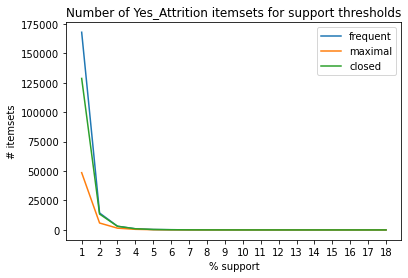

In [34]:
draw_multi_support_curves()

<h2> Print itemsets with highest support</h2>

In [35]:
global_itemsets_info = {}
for zmin in zmin_range:
    global_itemsets_info[str(zmin)] = {}
    for supp in support_range:
        global_itemsets_info[str(zmin)][str(supp)] = {}
        global_itemsets_info[str(zmin)][str(supp)][str("a")] = []
        global_itemsets_info[str(zmin)][str(supp)][str("m")] = []
        global_itemsets_info[str(zmin)][str(supp)][str("c")] = []

In [36]:
itemset_types = ['a', 'm', 'c']

zmin_range_reversed = sorted(zmin_range, reverse=True)
support_range_reversed = sorted(support_range, reverse=True)
for itemset_type in itemset_types:
    for zmin in zmin_range_reversed:
        for supp in support_range_reversed:
            itemsets = apriori(df_db, supp=supp, zmin=zmin, target=itemset_type, report='as')  
            # print('Number of %s itemsets for zmin=%s, supp=%s:' % (itemset_type, zmin, supp), len(itemsets))
            # update global dict
            for itemset in itemsets:
                if "Yes_Attrition" in itemset[0]:
                    tmp_list = global_itemsets_info[str(zmin)][str(supp)][str(itemset_type)]
                    tmp_list.append(itemset)
                    global_itemsets_info[str(zmin)][str(supp)][str(itemset_type)] = tmp_list

In [57]:
for itemset_type in itemset_types:

    tmp_support_dict = {}
    for zmin, value in global_itemsets_info.items(): 
        for supp, value2 in global_itemsets_info[str(zmin)].items():
            if len(global_itemsets_info[str(zmin)][str(supp)][itemset_type]) > 0:
                tmp_support_dict[str(supp)] = global_itemsets_info[str(zmin)][str(supp)][itemset_type][0]

    # ordering dict in descenting values (support)
    int_docs_info = {int(k) : v for k, v in tmp_support_dict.items()}
    support_dict = OrderedDict(sorted(int_docs_info.items(), key=lambda kv: kv[0], reverse=True))
    print("%s SUPERSETS WITH GREATEST SUPPORT:" % itemset_type)
    for key, value in support_dict.items():
        print("support=%s" % key, support_dict[key], "zmin=%s" % len(support_dict[key][0]))
        print()

    print()

a SUPERSETS WITH GREATEST SUPPORT:
support=14 (('Yes_Attrition', '0_YearsInCurrentRole'), 129, 0.14609286523216308) zmin=2

support=13 (('Yes_Attrition', '0_YearsInCurrentRole'), 129, 0.14609286523216308) zmin=2

support=12 (('Yes_Attrition', '0_YearsInCurrentRole'), 129, 0.14609286523216308) zmin=2

support=11 (('Yes_Attrition', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel'), 98, 0.11098527746319366) zmin=3

support=10 (('Yes_Attrition', '1_JobLevel', '0_YearsInCurrentRole'), 94, 0.10645526613816535) zmin=3

support=9 (('Yes_Attrition', '1_JobLevel', '0_YearsInCurrentRole'), 94, 0.10645526613816535) zmin=3

support=8 (('Yes_Attrition', '1_JobLevel', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel'), 74, 0.08380520951302378) zmin=4

support=7 (('Yes_Attrition', '1_JobLevel', '0_StockOptionLevel', '0_YearsInCurrentRole'), 67, 0.07587768969422423) zmin=4

support=6 (('Yes_Attrition', 'Yes_OverTime', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel'), 54, 0.06115515288

<h6> Print FP=0 Yes_Attrition itemsets </h6> 

In [77]:
def itemset_validation(itemset):
    res = df_converted[df_converted.columns]
    for i in range(0, len(itemset)):
        if "Attrition" in itemset[i]:
            continue
        elif "BusinessTravel" in itemset[i]:
            column_name = "BusinessTravel"
        else:
            column_name = itemset[i].split("_")[1]
        res = res[res[column_name] == itemset[i]][res.columns]

    res = res["Attrition"]
    yes_indeces = []
    no_indeces = []
    tmp_res_indeces = list(res.index)
    count_yes = 0
    count_no = 0
    for elem, i in zip(res, range(0, len(res))):
        if elem == "Yes_Attrition":
            count_yes += 1
            yes_indeces.append(tmp_res_indeces[i])
        else:
            count_no += 1
            no_indeces.append(tmp_res_indeces[i])
    return count_yes, count_no, yes_indeces, no_indeces

In [79]:
for itemset in global_itemsets_info[str(9)][str(1)]['a']:
    count_yes, count_no, yes_indeces, no_indeces = itemset_validation(itemset[0])
    if count_no == 0:
        print(itemset[0], "count_yes=%d" % count_yes, "count_no=%d" % count_no)

('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', '0_NumCompaniesWorked', 'Male_Gender', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel') count_yes=9 count_no=0
('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', 'Male_Gender', '0_MonthlyIncome', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel') count_yes=9 count_no=0
('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '1_JobLevel', '0_NumCompaniesWorked', 'Male_Gender', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel', '0_YearsInCurrentRole') count_yes=9 count_no=0
